<a href="https://colab.research.google.com/github/akritisshetty/credit-card-fraud-detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing & Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML models & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [ ]:
# Loading the dataset
df = pd.read_csv("card_transdata.csv")


print(df.columns)

print(df['fraud'].value_counts())

print(df.head())

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0 

In [ ]:
# Features and target
X = df.drop('fraud', axis=1)
y = df['fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

ROC-AUC: 0.9795296927426903


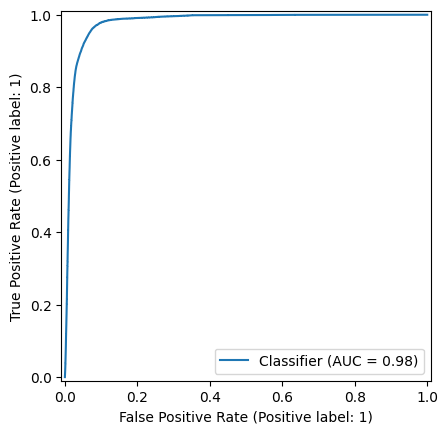

In [ ]:
# Logistic Regression with class weights
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear")
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob_lr)
plt.show()

In [ ]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.09, random_state=42)
# contamination ~ fraud rate (78k/893k ≈ 0.09)
iso_forest.fit(X_train)

# Predictions
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)  # map -1 → fraud

# Evaluation
print("Isolation Forest Results:")
print(classification_report(y_test, y_pred_iso))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_iso))

Isolation Forest Results:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    182519
         1.0       0.20      0.20      0.20     17481

    accuracy                           0.86    200000
   macro avg       0.56      0.56      0.56    200000
weighted avg       0.86      0.86      0.86    200000

ROC-AUC: 0.5620767600947498


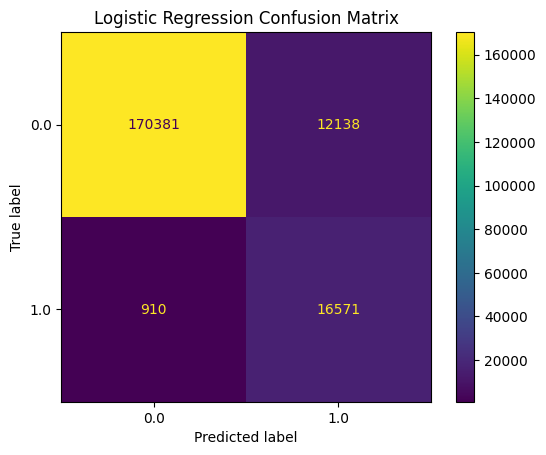

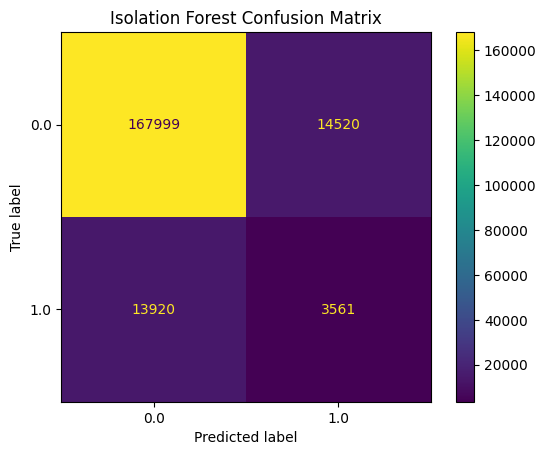

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Isolation Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_iso)
plt.title("Isolation Forest Confusion Matrix")
plt.show()

In [ ]:
# Example transaction (replace with your own values)
my_transaction = pd.DataFrame([{
    'distance_from_home': 5.0,
    'distance_from_last_transaction': 1.2,
    'ratio_to_median_purchase_price': 0.8,
    'repeat_retailer': 0,
    'used_chip': 0,
    'used_pin_number': 0,
    'online_order': 0
}])

# Scale with the same scaler as training
my_transaction_scaled = scaler.transform(my_transaction)


# Logistic Regression prediction
lr_pred = log_reg.predict(my_transaction_scaled)[0]
lr_prob = log_reg.predict_proba(my_transaction_scaled)[0][1]

print("Logistic Regression says:", "FRAUD" if lr_pred == 1 else "LEGIT")
print("Fraud probability:", lr_prob)

# Isolation Forest prediction
iso_pred = iso_forest.predict(my_transaction_scaled)[0]
iso_pred = 1 if iso_pred == -1 else 0  # convert to fraud=1, legit=0

print("Isolation Forest says:", "FRAUD" if iso_pred == 1 else "LEGIT")


Logistic Regression says: LEGIT
Fraud probability: 0.0015648376526384475
Isolation Forest says: LEGIT
